# How ChangeDetection Works?

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-ChangeDetection-Works?" data-toc-modified-id="How-ChangeDetection-Works?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How ChangeDetection Works?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Architecture" data-toc-modified-id="Architecture-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Architecture</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></li></ul></div>

### Introduction

We often get to see images of the same location at different points in time, and as humans, we can visually identify temporal changes in these images quite effortlessly. For instance, we can quickly observe, analyze, and digitize imagery to identify and segment buildings that have been newly constructed over the last decade. While this task is simple for us, it is relatively tricky for machines that need to ground their decisions in both the spatial and temporal information they are provided. Deep learning has made significant progress in computer vision, and Esri has added several of these deep learning models to ArcGIS API for Python. The computer vision models in `arcgis.learn` can perform tasks like Object Detection, Semantic Segmentation, Instance Segmentation, Image Translation, etc., and starting at `v1.8.3` , we have added another computer vision model for Binary Change Detection. Change detection is of primary importance in GIS, where we get many images of the same location but from different times. With this new model, we can solve various problems, from identifying new illegal construction to finding changes in land cover.

<figure>    
   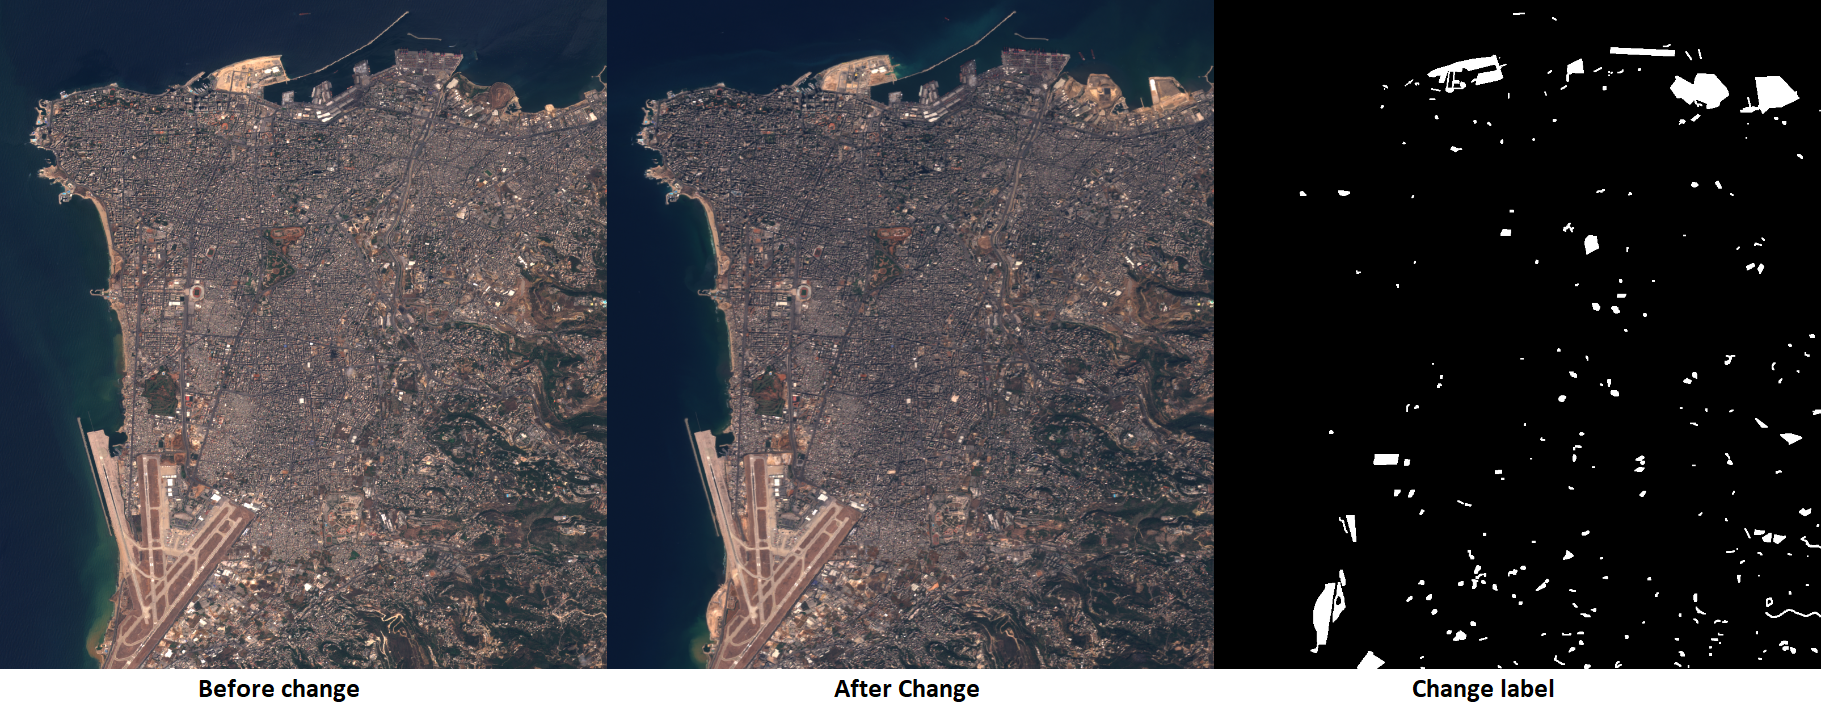
    <br>
    <center>
    <figcaption>Figure 1. Example of change detection in imagery. [1] </figcaption>
    </center>
</figure>

Binary Change Detection means that the model's output will be in two values, i.e., either change or no change. We can detect changes in specific features of interest and extract out the semantic map of that feature. For example, if we want to find out which new roads have come up in the past five years, we need to pass two images from respective points in time. Traditionally, intricate workflows and a lot of human involvement were required to extract out these change maps. However, we can do that with just some labeled data and with little to no human involvement by using deep learning.

### Architecture

The change detection architecture that is implemented in arcgis.learn is based on the STANet Paper [2]. It can be trained on coupled images with a semantic map of change as its target. For example, In the case of change detection in buildings, the label for the pair of images will be the change map of footprints that have either developed or disappeared. This architecture uses a self-attention mechanism at activations from fina layer of a convolutional neural network. The base architecture is a UNet like architecture with an encoder and a decoder. The encoder is usually an Imagenet pre-trained ResNet-based architecture, and the decoder is a combination of upsampling, 1x1 convolution, and self-attention layers. The forward pass through the network is done on images from both timelines. Once it receives the features, it passes through the attention module, and we receive attended feature maps. Upon receiving these features from the model, a loss or error function is computed, indicating that the models updated their parameters. The output of the architecture is the semantic map of only the change in our feature of interest. In Figure 2, I* represent an image, X* are the features from the encoder, and Z* are the features after applying attention. The metric module block in Figure 2 is the loss function. 

<figure>    
   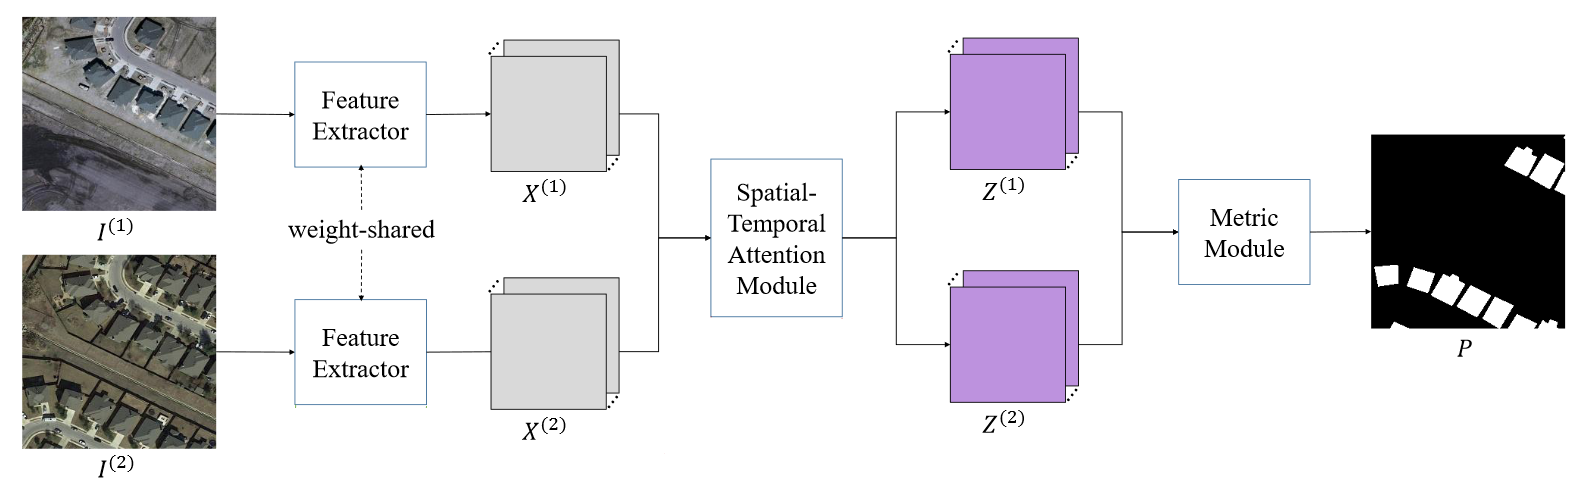
    <br>
    <center>
    <figcaption>Figure 2. STANet Network architecture  [2] </figcaption>
    </center>
</figure>

##### PAM vs BAM

There are two types of attention modules proposed in the STANet paper, PAM and BAM. PAM stands for Pyramid spatial–temporal Attention Module, while BAM stands for Basic spatial–temporal Attention Module. As the name suggests, PAM is an extension of the basic attention module. Figure 3 explains what each of these modules consists of. BAM is an attention module that enables the model to learn locations in the feature map that the model should pay attention to. The PAM is a bigger and better version of BAM, as it uses the BAM module on the different resolutions of the final feature map. This pyramid technique is very similar to the one we discussed in the "How PSPNet Works" guide [3].

<figure>    
   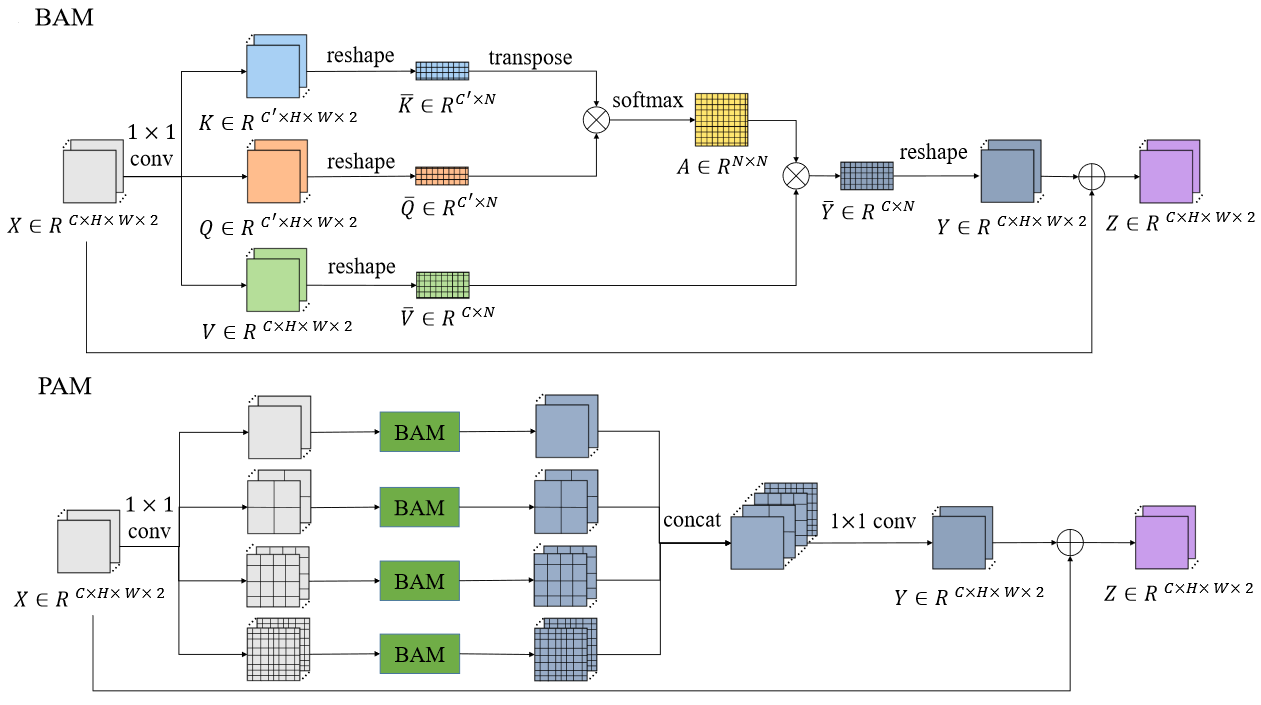
    <br>
    <center>
    <figcaption>Figure 3. Internal architecture for BAM and PAM. [2] </figcaption>
    </center>
</figure>

There are two types of the Spatial-Temporal Attention Module proposed in the paper. In `arcgis.learn`, you can switch to either one using the `attention_type` parameter when initializing the model. You can either set it to "PAM" or "BAM". The paper suggests using BAM to detect change in coarser features and using PAM to detect changes in finer features.

We can train a change detection model in a straightforward workflow that is explained in the change detection sample notebook. The exported data needs to be in a specific folder format, i.e., a folder having three folders: a) a folder named "images_before" containing images from the previous timeline, b) "images_after" including images of the later timeline and c) "labels" containing the change semantic map. We can pass the root path to the `prepare_data` function and specify the `dataset_type` to be "ChangeDetection". 

```python
data = prepare_data(root_path,
                    chip_size=224,
                    dataset_type='ChangeDetection', 
                    batch_size=2
                   )
```

We can then use this data object to see a batch using the `data.show_batch()` function and to initialize the `ChangeDetector` class.

```python
cd = ChangeDetector(data,
                    attention_type='BAM'   # 'PAM' is default.
                   )
```

We can use the tradional `arcgis.learn` workflow to train our model and see the results.

### References


* [1] Daudt, R.C., Le Saux, B., Boulch, A. and Gousseau, Y., 2018, July. Urban Change Detection for Multispectral Earth Observation Using Convolutional Neural Networks. In IEEE International Geoscience and Remote Sensing Symposium (IGARSS) 2018 (pp. 2115-2118). IEEE.

* [2] Chen, H., & Shi, Z. (2020). A Spatial-Temporal Attention-Based Method and a New Dataset for Remote Sensing Image Change Detection. Remote Sensing, 12(10), 1662.

* [3] Esri - ArcGIS API for Python Guides, How PSPNet works?